# Analysis of Workflow Systems

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv('workflow-systems.csv')

In [3]:
df.domain = df.domain.fillna('Uncategorized')

### Breakdown by Domain

Note that many workflow systems are designed to be general-purpose even though they may have started out in a particular domain.

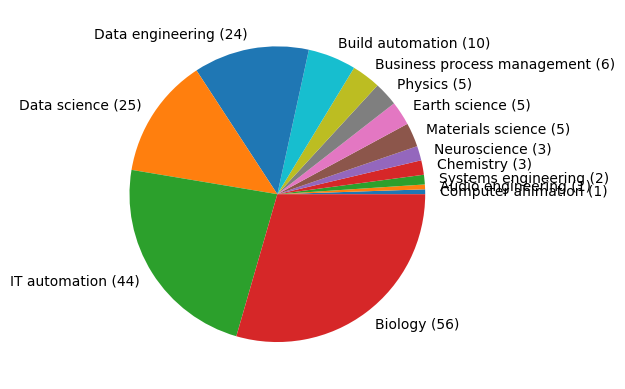

In [4]:
# compute counts
counts = {}
for key in df.domain:
    if key == 'Uncategorized':
        continue
    if key not in counts:
        counts[key] = 0
    counts[key] += 1

counts = dict(sorted(counts.items(), key=lambda item: item[1]))
labels = ['%s (%d)' % (k, v) for k, v in counts.items()]

# plot pie chart
_ = plt.pie(counts.values(), labels=labels)

### Breakdown by Language

In cases where a workflow system supports multiple languages (e.g. `Python / YAML`), only the first language is counted. To improve readability, languages with less than 3 (primary) occurences are grouped into "Other".

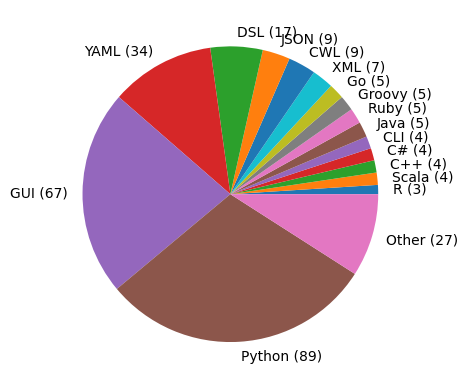

In [5]:
# compute counts
counts = {}
for value in df.language:
    key = value.split(' / ')[0]
    if key not in counts:
        counts[key] = 0
    counts[key] += 1

counts = dict(sorted(counts.items(), key=lambda item: item[1]))
count_other = sum(v for v in counts.values() if v < 3)
counts = {k: v for k, v in counts.items() if v >= 3}
counts['Other'] = count_other
labels = ['%s (%d)' % (k, v) for k, v in counts.items()]

# plot pie chart
_ = plt.pie(counts.values(), labels=labels)

### GitHub Stars by Domain

Note that [GitHub stars might be fake](https://dagster.io/blog/fake-stars), and different domains have different levels of participation on GitHub. The "best" workflow system is the one that best meets your specific requirements.

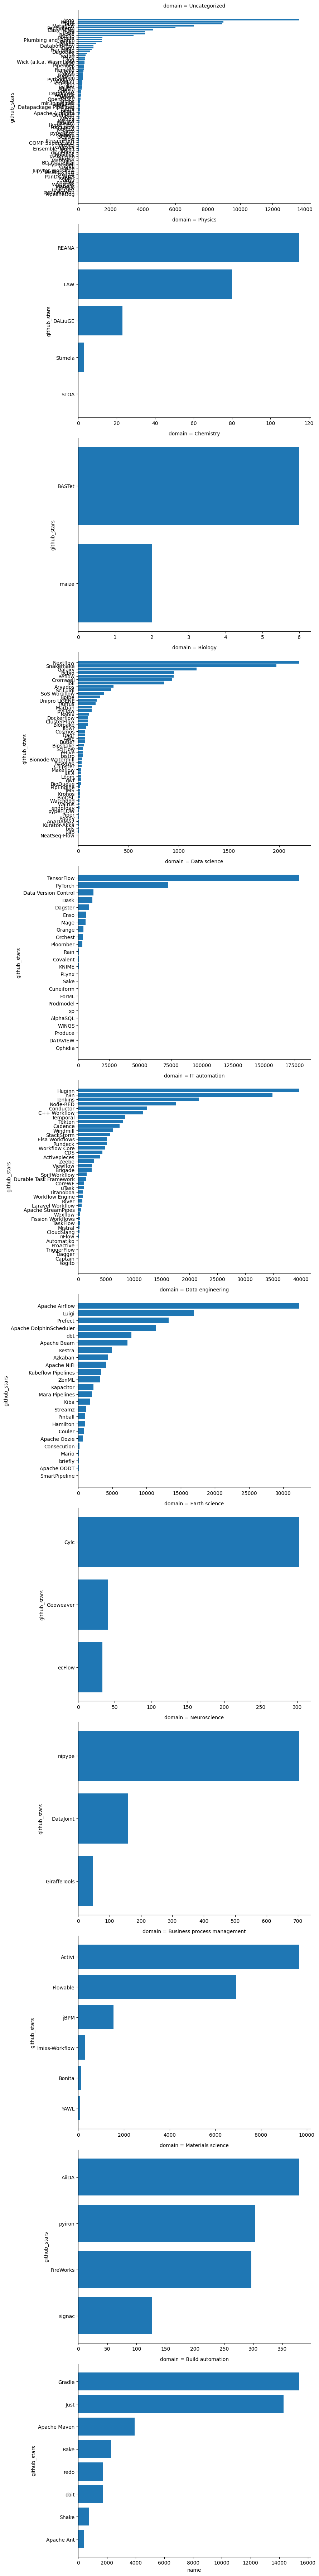

In [6]:
# select axes
xaxis = 'name'
yaxis = 'github_stars'
row   = 'domain'

# filter and sort data
data = df.copy()
data = data[~data[yaxis].isna()]
data.sort_values(by=yaxis, inplace=True, kind='mergesort')

# plot bar plots
g = sns.FacetGrid(
    data,
    row=row,
    sharex=False,
    sharey=False,
    height=6.0,
    aspect=1.5
)
g = g.map(
    plt.barh,
    xaxis,
    yaxis,
    data=data
)